In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_DF = pd.DataFrame(mouse_metadata)
study_results_DF = pd.DataFrame(study_results)

# Combine the data into a single DataFrame
merged_studydata_DF = pd.merge(study_results_DF, mouse_metadata_DF, on="Mouse ID", how="left")

# Display the data table for preview
merged_studydata_DF.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
mice_count = merged_studydata_DF["Mouse ID"].value_counts()
cleaned_mice_count = mice_count.count()

print(mice_count)
#print(cleaned_mice_count)

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64


In [3]:
cleaned_mice_1 = merged_studydata_DF.set_index(["Mouse ID", "Timepoint"])
cleaned_mice_1.head(60)

,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25
h246,0,45.0,0,Ketapril,Male,13,30
p189,0,45.0,0,Ketapril,Male,8,28
n923,0,45.0,0,Ketapril,Male,19,30
q119,0,45.0,0,Ketapril,Male,17,30


In [4]:
#print(merged_studydata_DF.dtypes)
merged_studydata_DF.loc[merged_studydata_DF["Mouse ID"] == "g989", :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = merged_studydata_DF.loc[merged_studydata_DF.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_studydata_DF = merged_studydata_DF[merged_studydata_DF["Mouse ID"].isin(duplicate_ID)==False]
cleaned_studydata_DF.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
95,k862,0,45.0,0,Stelasyn,Female,13,25
96,g867,0,45.0,0,Stelasyn,Female,9,25
97,s619,0,45.0,0,Stelasyn,Male,22,30
98,w697,0,45.0,0,Stelasyn,Female,14,30


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: Dataframe that includes each drug with each  
#mean, median, variance, standard deviation, and SEM of the tumor volume
# Assemble the resulting series into a single summary DataFrame.

# Capomulin, Ramicane, Ketapril, Naftisol, Zoniferol


mean = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
median = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
var = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
std = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()
sem = cleaned_studydata_DF["Tumor Volume (mm3)"].groupby(cleaned_studydata_DF["Drug Regimen"]).mean()


Summary_Statistics_DF = pd.DataFrame({"Mean Tumor Volume": mean,
                  "Median Tumor Volume": median,
                  "Variance Tumor Volume": var,
                  "Standard Deviation Tumor Volume": std,
                  "SEM Tumor Volume": sem})

Summary_Statistics_DF.head()

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,40.675741,40.675741,40.675741
Ceftamin,52.591172,52.591172,52.591172,52.591172,52.591172
Infubinol,52.884795,52.884795,52.884795,52.884795,52.884795
Ketapril,55.235638,55.235638,55.235638,55.235638,55.235638
Naftisol,54.331565,54.331565,54.331565,54.331565,54.331565


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_method = Summary_Statistics_DF(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])

KeyError: 'Tumor Volume (mm3)'

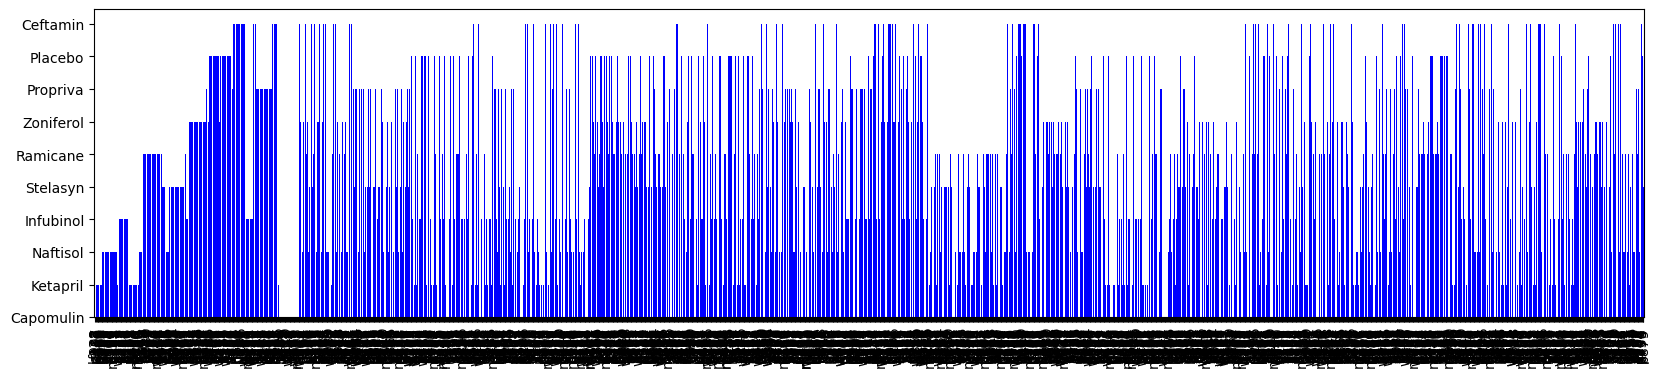

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

x_axis = np.arange(len(cleaned_studydata_DF))
tick_location = [value for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, cleaned_studydata_DF["Drug Regimen"], color="b", alpha=1)
plt.xticks(tick_location, cleaned_studydata_DF["Mouse ID"], rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.show()


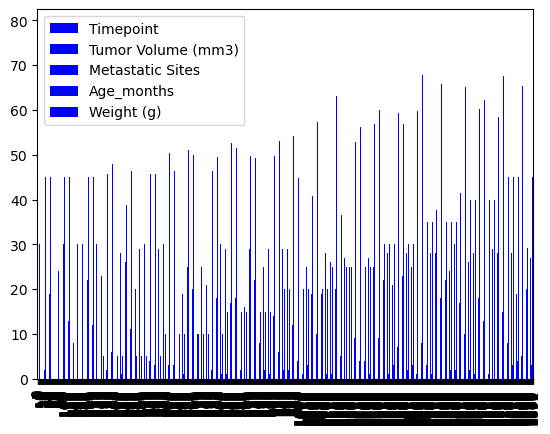

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Slt_Drug_Bar = cleaned_studydata_DF.plot.bar(color="b")

plt.xlabel=("Drug Regimen")
plt.ylabel=("# of observed Timepoints")
plt.title=("ie OBserved timepoints per treatment")
plt.tight.layout()

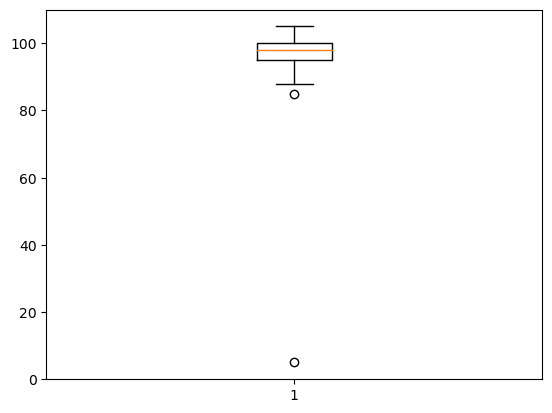

In [66]:
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()

ax1.boxplot(times)
plt.show()